In [95]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.max_colwidth', 100)

from statsmodels.tsa.stattools import grangercausalitytests

# Import Data

In [2]:
spwr = pd.read_csv('./spwr_closing_popularity_sentiment.csv')

In [4]:
spwr.set_index('Date', inplace=True)

In [6]:
spwr_normalized = pd.read_csv('./spwr_normalized_closing_popularity_sentiment.csv')

In [7]:
spwr_normalized.set_index('Date', inplace=True)

# Lag Analysis

In [16]:
def plot_cross_correlation(df):
    fig, ax1 = plt.subplots(figsize=(18,5))
    ax1.xcorr(df['Sentiment Score'].to_numpy().flatten(), df['Closing Price'].to_numpy().flatten(), usevlines=True, maxlags=10, normed=True, lw=2)
    ax1.grid(True)
    plt.show()

In [13]:
spwr_normalized

,Closing Price,Daily Tweets,Sentiment Score
Date,,,
2011-01-03,0.184912,0.008274,0.674062
2011-01-04,0.196258,0.002364,0.458135
2011-01-05,0.200836,0.009456,0.608638
2011-01-06,0.196208,0.017730,0.382027
2011-01-07,0.192476,0.029551,0.375734
...,...,...,...
2021-03-26,0.579220,0.093381,0.605803
2021-03-29,0.506967,0.043735,0.570483
2021-03-30,0.552349,0.092199,0.568617


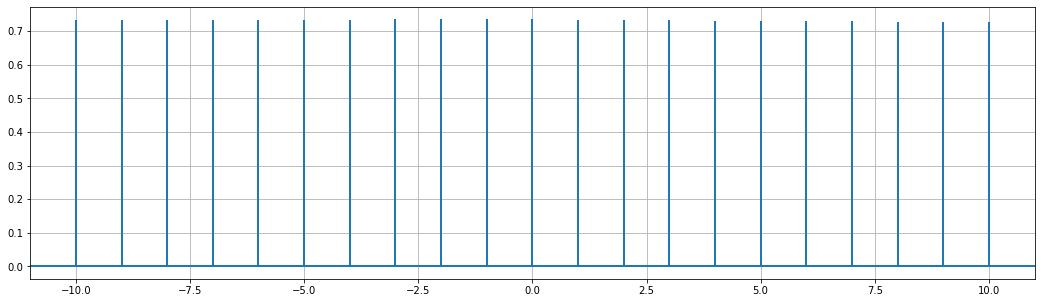

In [17]:
plot_cross_correlation(spwr_normalized)

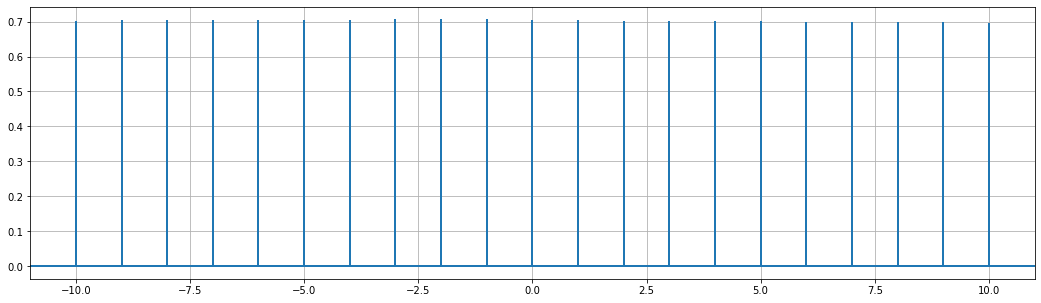

In [24]:
plot_cross_correlation(spwr)

In [45]:
def plot_cross_correlation_v2(df):
    fig, ax1 = plt.subplots(figsize=(18,5))
    ax1.xcorr(df['Sentiment Score'].to_numpy().flatten(), df['Closing Price'].to_numpy().flatten(), usevlines=False, maxlags=30, normed=True, lw=2)
    ax1.grid(True)
    plt.show()

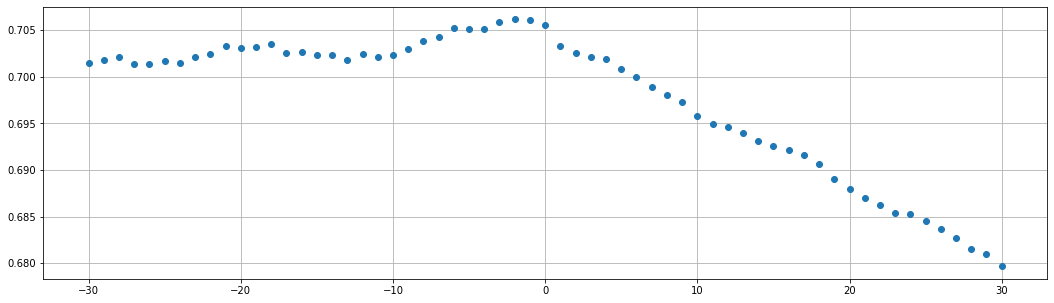

In [46]:
plot_cross_correlation_v2(spwr)

In [91]:
def plot_cross_correlation_v3(df):
    fig, ax1 = plt.subplots(figsize=(18,5))
    test = ax1.xcorr(df['Sentiment Score'].to_numpy().flatten(), df['Closing Price'].to_numpy().flatten(), usevlines=False, maxlags=40)
    ax1.grid(True)
    plt.show()
    return test

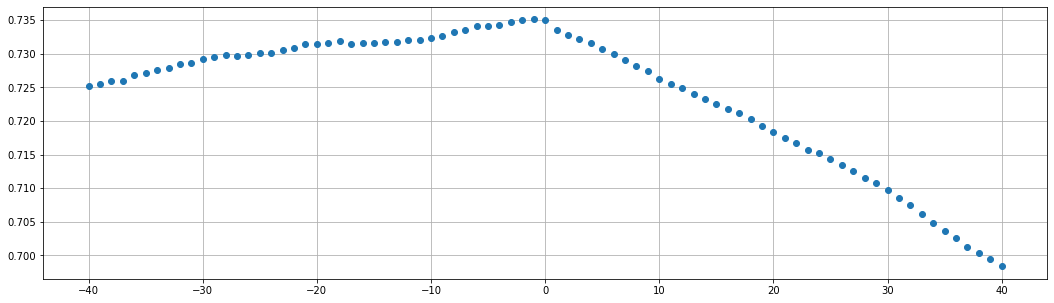

In [92]:
result = plot_cross_correlation_v3(spwr_normalized)

In [90]:
result

(array([-40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28,
        -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15,
        -14, -13, -12, -11, -10,  -9,  -8,  -7,  -6,  -5,  -4,  -3,  -2,
         -1,   0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,
         12,  13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,
         25,  26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,
         38,  39,  40]),
 array([0.72520976, 0.72551307, 0.72603536, 0.72602998, 0.72684419,
        0.72709245, 0.72760627, 0.72796255, 0.72849201, 0.72866553,
        0.72924498, 0.72958481, 0.72986305, 0.72966255, 0.72981705,
        0.73012844, 0.73018033, 0.73061296, 0.73090123, 0.73141602,
        0.73145711, 0.73159857, 0.73186765, 0.73153881, 0.73168173,
        0.73166594, 0.73178944, 0.7316955 , 0.73209949, 0.73210019,
        0.73232822, 0.7327068 , 0.73323865, 0.73352344, 0.73408486,
        0.73420745, 0.73431691, 0.7347759 , 0.73503407, 0.735

# Granger Causality 

In [108]:
spwr.columns

Index(['Closing Price', 'Daily Tweets', 'Sentiment Score'], dtype='object')

In [118]:
data = np.asarray(spwr[['Sentiment Score', 'Closing Price']])
maxlag = 2
grangercausalitytests(data, maxlag, addconst=True, verbose=True)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=8.6364  , p=0.0033  , df_denom=2536, df_num=1
ssr based chi2 test:   chi2=8.6466  , p=0.0033  , df=1
likelihood ratio test: chi2=8.6319  , p=0.0033  , df=1
parameter F test:         F=8.6364  , p=0.0033  , df_denom=2536, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=3.3560  , p=0.0350  , df_denom=2533, df_num=2
ssr based chi2 test:   chi2=6.7252  , p=0.0346  , df=2
likelihood ratio test: chi2=6.7163  , p=0.0348  , df=2
parameter F test:         F=3.3560  , p=0.0350  , df_denom=2533, df_num=2


{1: ({'ssr_ftest': (8.636405878060247, 0.0033248559871936517, 2536.0, 1),
   'ssr_chi2test': (8.646622446527982, 0.0032766821864387264, 1),
   'lrtest': (8.631932652991964, 0.0033032094835790354, 1),
   'params_ftest': (8.636405878060243, 0.0033248559871936517, 2536.0, 1.0)},
   array([[0., 1., 0.]])]),
 2: ({'ssr_ftest': (3.355996139455665, 0.03502974970465852, 2533.0, 2),
   'ssr_chi2test': (6.72524137539556, 0.034644347855760586, 2),
   'lrtest': (6.716346747514763, 0.03479876526376789, 2),
   'params_ftest': (3.35599613945573, 0.035029749704650774, 2533.0, 2.0)},
   array([[0., 0., 1., 0., 0.],
          [0., 0., 0., 1., 0.]])])}

In [115]:
# result = grangercausalitytests(spwr['Sentiment Score'], spwr['Closing Price'], addconst=True, verbose=True)